# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів



---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.


Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

## Підготовка даних


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
data_path = "drive/MyDrive/Homeworks/yulu_bike_sharing_dataset.csv"
df = pd.read_csv(data_path)

In [4]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  int64  
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  int64  
 4   temp         10886 non-null  float64
 5   atemp        10886 non-null  float64
 6   humidity     10886 non-null  int64  
 7   windspeed    10886 non-null  float64
 8   casual       10886 non-null  int64  
 9   registered   10886 non-null  int64  
 10  count        10886 non-null  int64  
 11  date         10886 non-null  object 
 12  day          10886 non-null  int32  
 13  week         10886 non-null  UInt32 
 14  weekday_num  10886 non-null  int32  
 15  weekday      10886 non-null  object 
 16  year         10886 non-null  int32  
 17  month        10886 non-null  int32  
 18  hour       

In [6]:
print(len(df))
print(df.shape)

10886
(10886, 19)


In [7]:
df.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


In [8]:
print(df['season'])

datetime
2011-01-01 00:00:00    1
2011-01-01 01:00:00    1
2011-01-01 02:00:00    1
2011-01-01 03:00:00    1
2011-01-01 04:00:00    1
                      ..
2012-12-19 19:00:00    4
2012-12-19 20:00:00    4
2012-12-19 21:00:00    4
2012-12-19 22:00:00    4
2012-12-19 23:00:00    4
Name: season, Length: 10886, dtype: int64


In [9]:
df.groupby('season').size()

,0
season,
1,2686
2,2733
3,2733
4,2734


Size: 10886 observations, 19 columns

Granularity: hourly data (bike rental)

Allows to conduct analysis on hourly, daily, monthly, weekly and quarterly level. Each row contains info on season, weather, temperature, bike rentals (type), day, week, month, time and rental counts.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [10]:
df['date'] = pd.to_datetime(df['date'])
daily_df = df.groupby(df['date'].dt.date)['count'].sum()

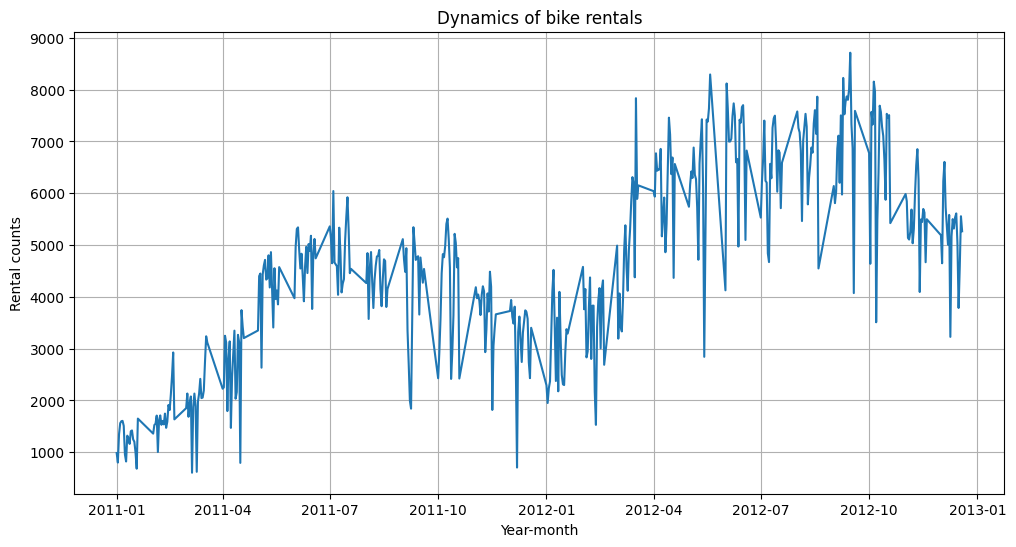

In [11]:
daily_df.plot(
    kind='line',
    figsize=(12, 6),
    title='Dynamics of bike rentals',
    xlabel='Year-month',
    ylabel= 'Rental counts',
    grid=True
);

1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?

This is normal for time series data, most likely caused by day of the week variability, weather conditions and prossibly holidays. This is the representation of the real behaviour, so it is not possible to remove them completely; however, it is possible to smoothen the data by using moving average or possibly resampling (aggregating data to a larger period of time).

2. Які загальні тенденції ви бачите на графіку?

In general, the demand grows, the amount of bike rentals increases over time.

3. Чи помітні якісь сезонні коливання?

Yes, we can observe seasonal fluctuations (high values: Apr-Oct, low values: Nov-Feb).

4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?

Yes, abnormally low and high values can be observed on the graph. Abnormally high values - most likely due to good weather, events, holidays; abnormally low values - bad weather conditions, closed rental service due tu public holidays etc.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами(кварталами). Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте квартали не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який квартал найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?

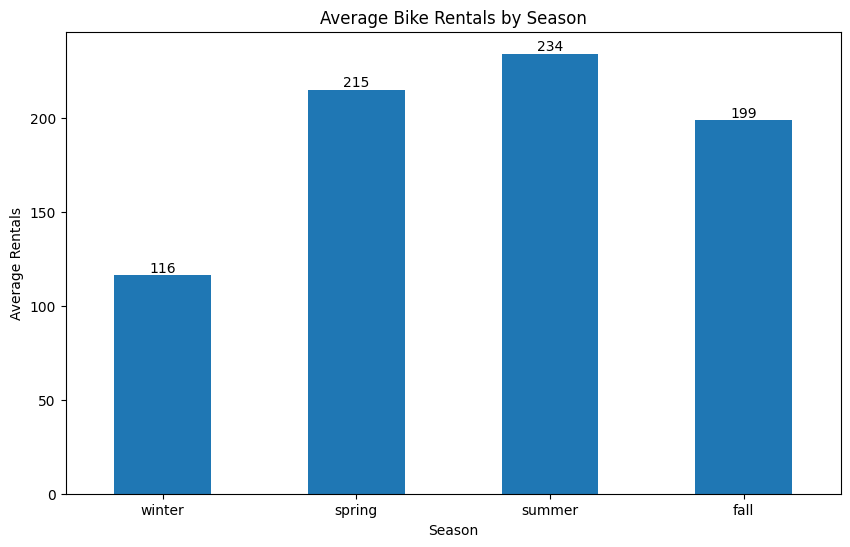

In [12]:
mean_by_season = df.groupby('season')['count'].mean()
season_names = { 1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
mean_by_season.index = mean_by_season.index.map(season_names)

ax = mean_by_season.plot(
    kind='bar',
    figsize=(10, 6),
    title='Average Bike Rentals by Season',
    ylabel='Average Rentals',
    xlabel='Season',
    grid=False
)

for i, value in enumerate(mean_by_season):
    ax.text(i, value, f'{value:.0f}', ha='center', va='bottom', fontsize=10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0);

In [13]:
234/116

2.0172413793103448

1. В який квартал найбільша середня кількість оренди велосипедів?
During Summer, Q3 (234)

2. Як ви можете пояснити таку сезонну закономірність?
It can be explained by weather, in winter - it is cold, snowing, the day is short - less rentals; in spring the amount of bike rentals increases due to good weather (temperature rises, days are longer etc), summer is the most popular season for bike rentals - great weather conditions, people take holidays etc; fall - still good weather (not too hot for biking).
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми? Twice as much

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


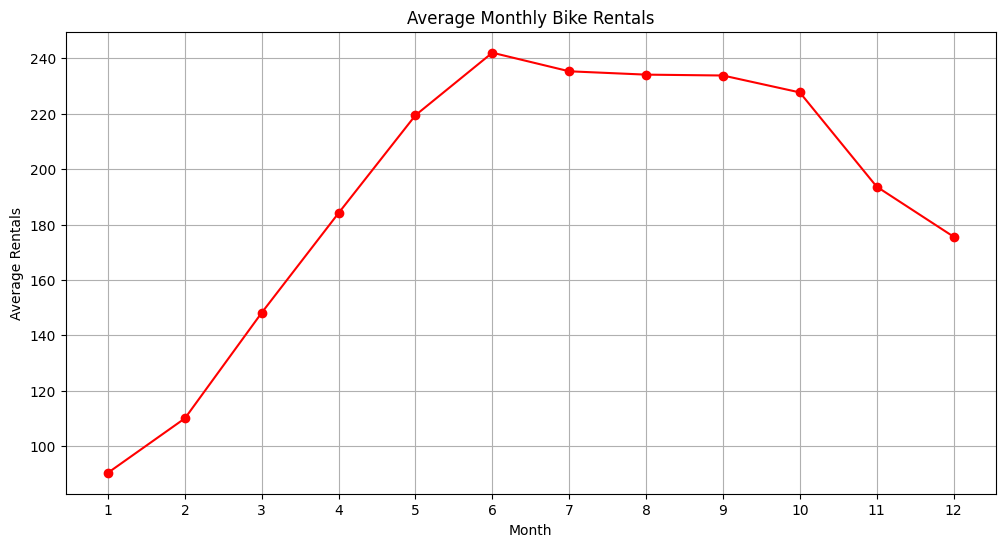

In [14]:
mean_by_month = df.groupby(df['date'].dt.month)['count'].mean()
ax = mean_by_month.plot(
    kind='line',
    figsize=(12, 6),
    color='red',
    marker='o',
    grid=True,
    title='Average Monthly Bike Rentals'
)

ax.set_xlabel('Month')
ax.set_ylabel('Average Rentals')

ax.set_xticks(range(1, 13));


1.В які місяці спостерігається пік та спад оренди? Peak - Jun (summer), drop - Jan (Winter)

2.Чи збігається ця закономірність з результатами з попереднього завдання? Overall yes, the peak is observed during summer (Jun-Aug) and drop during winter months, same as previously.

3.Як може вплинути клімат на оренду велосипедів протягом року? Bad weather (fog, rain, snow, ice) has a negative impact on the bike rentals leading to reduced demand.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

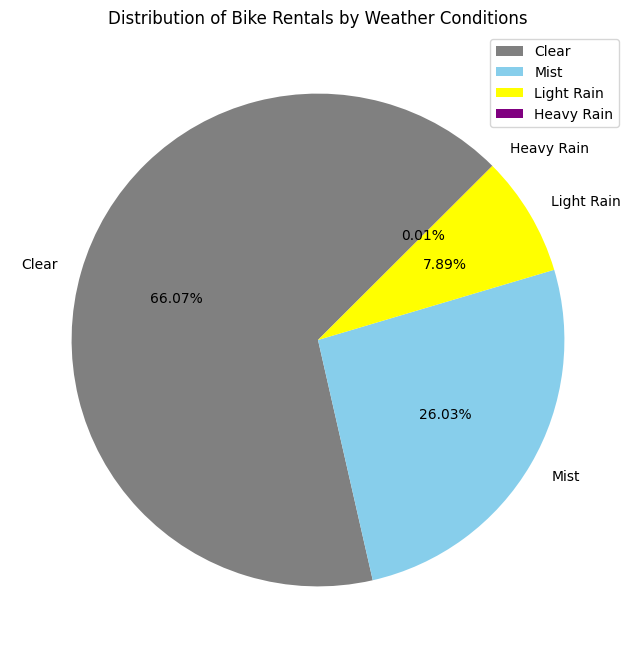

In [15]:
weather_labels = {1: 'Clear',2: 'Mist',3: 'Light Rain',4: 'Heavy Rain'}
df['weather_name'] = df['weather'].map(weather_labels)
weather_counts = df['weather_name'].value_counts()
colors = ['grey', 'skyblue','yellow','purple']

ax = weather_counts.plot(
    kind='pie',
    figsize=(8, 8),
    autopct='%1.2f%%',
    colors=colors,
    startangle=45,
    legend=True
)

ax.set_ylabel('')
ax.set_title('Distribution of Bike Rentals by Weather Conditions');

1. Яка погода переважає в датасеті? Clear weather (66.07%)
2. Чи є дні із сильним дощем? Яка їх частка? Very few (0.01%)
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів? Good clear weather - more rentals, bad weather (light/heavy rain, mist) - bike rentals drop.

Очікуваний результат:

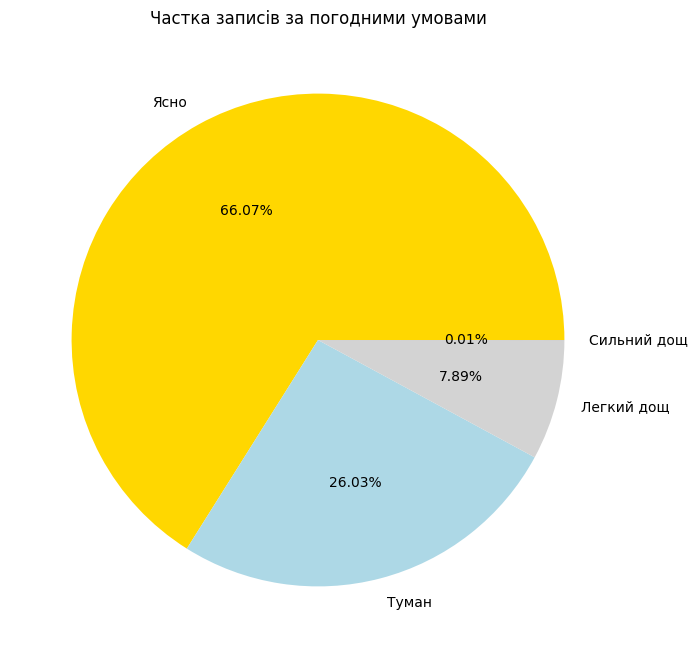

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

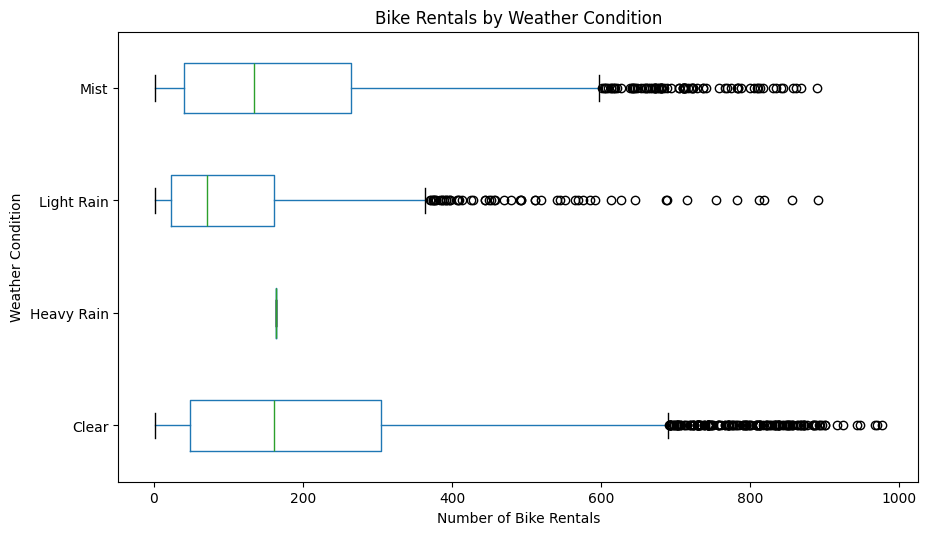

In [16]:
weather_labels = {1: 'Clear',2: 'Mist',3: 'Light Rain', 4: 'Heavy Rain'}
df['weather_name'] = df['weather'].map(weather_labels)
ax = df.boxplot(
    column='count',
    by='weather_name',
    vert=False,
    figsize=(10, 6),
    grid=False
)

ax.set_xlabel('Number of Bike Rentals')
ax.set_ylabel('Weather Condition')
ax.set_title('Bike Rentals by Weather Condition')
ax.get_figure().suptitle('');


1. При якій погоді найбільший розкид у кількості оренди? Clear (up to 1000)
2. Чи є викиди (outliers) в даних? При якій погоді? Yes, in all categories except heavy rain
3. При якій погоді медіанне значення оренди найвище? Clear



## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

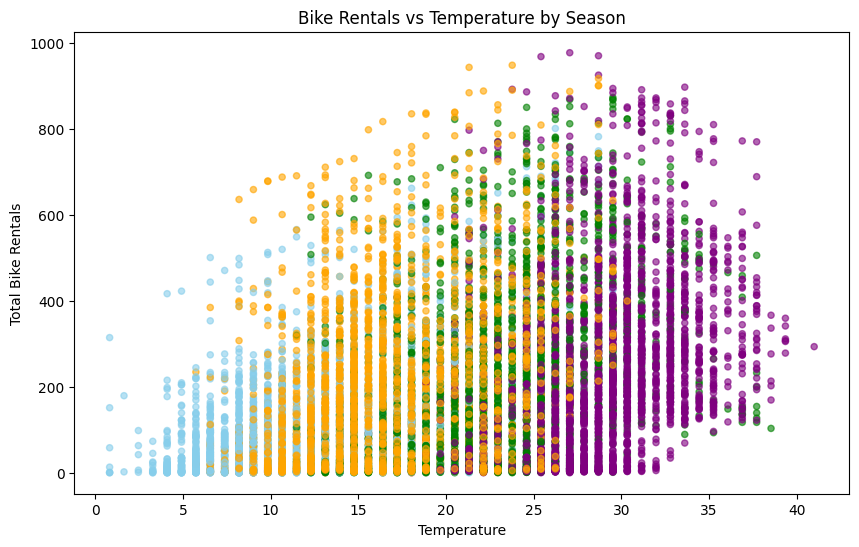

In [17]:
season_labels = {1: 'Winter',2: 'Spring',3: 'Summer',4: 'Fall'}
df['season_name'] = df['season'].map(season_labels)
season_colors = {
    'Winter':'skyblue',
    'Spring':'green',
    'Summer':'purple',
    'Fall':'orange'}
df['color'] = df['season_name'].map(season_colors)

ax = df.plot(
    kind='scatter',
    x='temp',
    y='count',
    c=df['color'],
    alpha=0.6,
    figsize=(10, 6),
    title='Bike Rentals vs Temperature by Season'
)

ax.set_xlabel('Temperature')
ax.set_ylabel('Total Bike Rentals');


There is a correlation but it depends on the temperature. The higher the temperature, more bikes are rented (till 25 degrees), after 30 degrees there is a reduction in bike rentals.

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

In [18]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'date', 'day',
       'week', 'weekday_num', 'weekday', 'year', 'month', 'hour',
       'weather_name', 'season_name', 'color'],
      dtype='object')

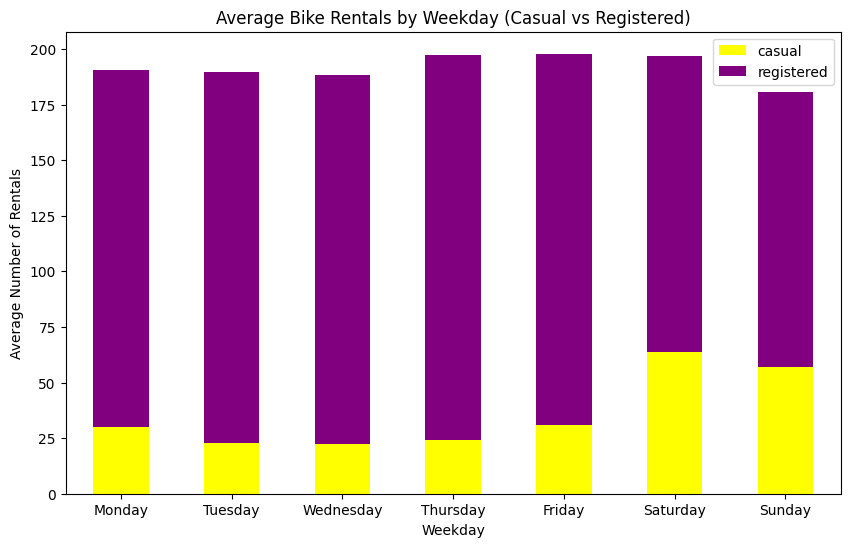

In [19]:
avg_by_weekday = df.groupby('weekday')[['casual', 'registered']].mean()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_by_weekday = avg_by_weekday.reindex(weekday_order)

ax = avg_by_weekday.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['yellow', 'purple'],
    title='Average Bike Rentals by Weekday (Casual vs Registered)'
)

ax.set_xlabel('Weekday')
ax.set_ylabel('Average Number of Rentals')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);


1.В які дні тижня більше оренд від зареєстрованих користувачів? from Monday to Friday.

2.Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня? Most likely registered users use bikes for commuting every day to work/school/college/sports clubs etc. Casual users rent a bike most likely when they travel during holidays.